# Project 1: Digit Classification with KNN and Naive Bayes

In this project, you'll implement your own image recognition system for classifying digits. Read through the code and the instructions carefully and add your own code where indicated. Each problem can be addressed succinctly with the included packages -- please don't add any more. Grading will be based on writing clean, commented code, along with a few short answers.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but <b> please prepare your own write-up (with your own code). </b>

If you're interested, check out these links related to digit recognition:

Yann Lecun's MNIST benchmarks: http://yann.lecun.com/exdb/mnist/

Stanford Streetview research and data: http://ufldl.stanford.edu/housenumbers/

In [2]:
# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

Load the data. Notice that we are splitting the data into training, development, and test. We also have a small subset of the training data called mini_train_data and mini_train_labels that you should use in all the experiments below, unless otherwise noted.

In [3]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print 'data shape: ', X.shape
print 'label shape:', Y.shape

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

data shape:  (70000, 784)
label shape: (70000,)


(1) Create a 10x10 grid to visualize 10 examples of each digit. Python hints:

- plt.rc() for setting the colormap, for example to black and white
- plt.subplot() for creating subplots
- plt.imshow() for rendering a matrix
- np.array.reshape() for reshaping a 1D feature vector into a 2D matrix (for rendering)

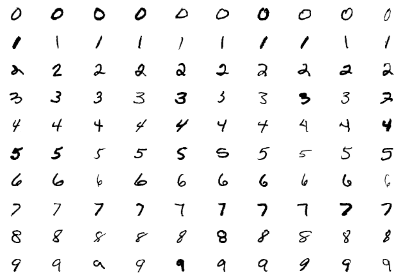

In [3]:
#def P1(num_examples=10):

### STUDENT START ###

def P1(num_examples=10):
    """Plots examples of each digit from the MNIST data set.
    
    Parameters:
    -----------
    
    num_examples: int, number of examples of each digit to plot.
    
    Returns:
    --------
    A 10x10 grid which visualizes 10 examples of each digit.
    """
    # ---------------------- choose examples ------------------------ #
    # draw num_examples randomly for each digit from the mini training data set
    def get_indices(labels,digit,size,num_examples):
        return np.random.choice(a=np.flatnonzero(mini_train_labels==digit),
                             size=num_examples,replace=False)
    
    digit_index={int(digit):get_indices(mini_train_labels,digit,10,num_examples)
                 for digit in np.unique(mini_train_labels)}

    # --------- plot each digit num_examples times------------------- #
    fig, axes = plt.subplots(nrows=len(digit_index.keys()),
                             ncols=num_examples)
    # generate subplot for each example for each digit
    for digit in digit_index.keys():
        for nth in range(num_examples):
            index = digit_index[digit][nth]
            dat_to_plot = mini_train_data[index].reshape(28,28)
            axes[digit][nth].imshow(dat_to_plot,cmap='Greys')
            axes[digit][nth].axis('off') # reduce the clutter around the images
            axes[digit][nth].get_xaxis().set_visible(False) # reduce the whitespace
            axes[digit][nth].get_yaxis().set_visible(False) # between the subplots
    fig.tight_layout()
    plt.show()
    
P1(10)    
 
### STUDENT END ###

#P1(10)

(2) Evaluate a K-Nearest-Neighbors model with k = [1,3,5,7,9] using the mini training set. Report accuracy on the dev set. For k=1, show precision, recall, and F1 for each label. Which is the most difficult digit?

- KNeighborsClassifier() for fitting and predicting
- classification_report() for producing precision, recall, F1 results

In [4]:
#def P2(k_values):

### STUDENT START ###
def P2(k_values,complete_report=True,print_report=True):
    """Evaluates the K-Nearest-Neighbor model.
    
       Evaluation occurs on the mini training set, accuracy checking on the development set.
       
       Parameters:
       -----------
       
       k_values: iterable, 
                 an iterable of integers denoting the number of neighbors.
       complete_report: boolean,
                 if True, returns the precision, recall and F1 for each digit in the dev set.
                 if False, returns the accuracy of k_values.
       print_report: boolean,
                 only have an effect is complete_report is True. If print_report is True, print
                 the classification table. 
       Returns:
       --------
       Classification reports
    """
    
    def report_k(k_value,complete_report,print_report):
        """Returns either a complete classification report or a dictionary of accuracies."""
        
        # fit and predict K-Nearest-Neighbors
        neighbors = KNeighborsClassifier(n_neighbors=k_value)
        neighbors.fit(mini_train_data,mini_train_labels)
        pred_labels = neighbors.predict(dev_data)
        # return classification report or accuracy
        if(complete_report):
            report = classification_report(dev_labels,pred_labels)
            if(print_report):
                print 'Classification report for {m}:\n {r}'.format(m=neighbors,r=report)
            return report
        else:
            # calculate accuracy as correct classifications over all classificatons
            correct = sum(pred_labels==dev_labels)
            return float(correct) / len(dev_labels)
        #     Alternatively, we could have gotten the accuracy scores from
        #     sklearn.metrics.accuracy_score as well
        #     return accuracy_score(pred_labels,dev_labels)
    # get the reports for each k
    reports = {k_value:report_k(k_value,complete_report,print_report) for k_value in k_values}
    return reports
    
k_values = [1, 3, 5, 7, 9]
# get the accuracy of each k
print 'The accuracies are {acc}.\n'.format(acc=P2(k_values,complete_report=False))

# print classification table 
P2([1])

    
### STUDENT END ###

#k_values = [1, 3, 5, 7, 9]
#P2(k_values)

The accuracies are {1: 0.888, 3: 0.878, 9: 0.863, 5: 0.869, 7: 0.865}.

Classification report for KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform'):
              precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000



{1: '             precision    recall  f1-score   support\n\n        0.0       0.91      0.98      0.94        99\n        1.0       0.89      1.00      0.94       105\n        2.0       0.99      0.79      0.88       102\n        3.0       0.77      0.87      0.82        86\n        4.0       0.89      0.82      0.85       104\n        5.0       0.93      0.84      0.88        91\n        6.0       0.94      0.96      0.95        98\n        7.0       0.89      0.92      0.90       113\n        8.0       0.94      0.88      0.91        96\n        9.0       0.78      0.82      0.80       106\n\navg / total       0.89      0.89      0.89      1000\n'}

ANSWER:

The *k*=1 has the highest accuracy with about 89% of the cases labelled correctly. The accuracy of the model decreases with increasing number of neighbors taken into account.

Measured by the F$_1$ score, the number 9 is the most difficult digit. Its accuracy is almost as low as the accuracy of number 3 but it has a lower a recall rate.

(3) Using k=1, report dev set accuracy for the training set sizes below. Also, measure the amount of time needed for prediction with each training size.

- time.time() gives a wall clock value you can use for timing operations

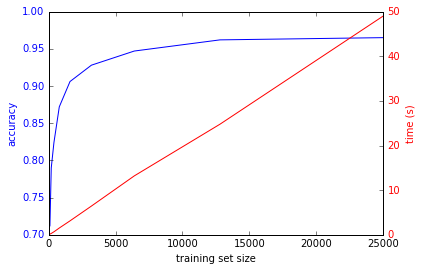

{1600: [0.906, 3.122], 3200: [0.928, 6.439], 100: [0.712, 0.152], 200: [0.79, 0.304], 6400: [0.947, 13.197], 400: [0.824, 0.67], 25000: [0.962, 49.033], 12800: [0.965, 24.779], 800: [0.872, 1.522]}


In [60]:
#def P3(train_sizes, accuracies):

### STUDENT START ###

def P3(train_sizes,plot_results=True):
    """Calculates accuracy and required time for 1-NN predictions.
    
    Parameters:
    -----------
    train_sizes: iterable,
                 integers denoting the size of the training set.
    plot_results: boolean,
                 if True, creates a plot with accuracy and time plotted on two separate y-axes
                 and training set size on the x-axis.
    Returns:
    --------
    A dictionary of sizes as keys and accuracies as values.
    """
    
    def get_accuracy(train_size):
        """Calculates accuracy and required time for KNN-1 predictions"""
        
        neighbors = KNeighborsClassifier(n_neighbors=1)
        index_to_fit = np.random.choice(range(len(train_labels)), train_size)
        neighbors.fit(train_data[index_to_fit],
                      train_labels[index_to_fit])
        # check time when prediction starts
        start_pred = time.time()
        pred_labels = neighbors.predict(dev_data)
        # calculate length of prediction
        time_pred = time.time()-start_pred
        correct = sum(pred_labels==dev_labels)
        accuracy = float(correct)/len(dev_labels)
        return [accuracy,round(time_pred,3)]
    # plot accuracy and time to predict against training set size
    result = {size:get_accuracy(size) for size in train_sizes}
    if(plot_results):
        # code implemented from http://matplotlib.org/examples/api/two_scales.html
        # first y-axis
        fig, ax1 = plt.subplots()
        # We need to sort the dictionary to ensure that the y values on both axes match the
        # each other and the x axis as well.
        # Ideally, we could use an ordered dictionary instead of dict but here sort works
        # as well as both accuracy and prediction time increases with sample size.
        y1 = sorted([value[0] for value in result.values()])
        ax1.plot(train_sizes, y1, 'b-')
        ax1.set_xlabel('training set size')
        # Make the y-axis label and tick labels match the line color.
        ax1.set_ylabel('accuracy', color='b')
        for tl in ax1.get_yticklabels():
            tl.set_color('b')
        # second y-axis
        ax2 = ax1.twinx()
        # Second y-axis needs to be sorted as well as above
        y2 = sorted([value[1] for value in result.values()])
        ax2.plot(train_sizes, y2, 'r-')
        # Make the y-axis label and tick labels match the line color.
        ax2.set_ylabel('time (s)', color='r')
        for tl in ax2.get_yticklabels():
            tl.set_color('r')
        plt.show()
    return result
    
train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
P3_result = P3(train_sizes)
# save accuracies for the Box-Cox transformation in the next question
accuracies = sorted([value[0] for value in P3_result.values()])
print P3_result

### STUDENT END ###

#train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
#accuracies = []
#P3(train_sizes, accuracies)

(4) Fit a regression model that predicts accuracy from training size. What does it predict for n=60000? What's wrong with using regression here? Can you apply a transformation that makes the predictions more reasonable?

- Remember that the sklearn fit() functions take an input matrix X and output vector Y. So each input example in X is a vector, even if it contains only a single value.

In [73]:
def P4(train_sizes,transform=None,inverse_transform=None):
    """Predicts the accuracy of 1-NN with a training set size of 60,000.
    
    Parameters:
    -----------
    train_sizes: iterable,
                 integers denoting the size of the training set.
    transform: a function to transform the dependent variable. Does not accept any additional
            arguments beside the data itself.
    inverse_transform: a function to transfrom the prediction back to the original scale. Does
            not accept any additional arguemnts beside the data itself.
    Returns:
    --------
    Predicted accuracy of a 1-NN model with training set size of 60,000.
    """
    # calculate accuracies for each training set sample size
    size_acc = P3(train_sizes,plot_results=False)
    # sort to ensure that the accuracies are returned in the correct order
    accuracies = sorted([value[0] for value in size_acc.values()])
    # set accuracies as Numpy array for the eventual transformations
    accuracies_array = np.array(accuracies)
    if(transform is not None):
        accuracies_array = transform(accuracies_array)
    # reshape the list of training set sizes to a 1D matrix
    train_size_matrix = np.array(train_sizes).reshape((len(train_sizes),1))
    # run linear regression
    lr = LinearRegression(fit_intercept=True)
    lr.fit(train_size_matrix,accuracies_array) 
    prediction = lr.predict(np.array(60000).reshape(1,1))
    if(transform is not None):
        prediction = inverse_transform(prediction)
    return prediction

P4(train_sizes)

array([ 1.22792738])

ANSWER: The linear regression predicts 1.23 for the training set size of 60,000. As the support of the accuracies is on $[0,1]$, this prediction is unsupported. Moreover, as the plot in the previous example shows, the accuracies are strongly non-linearly related to training set sample sizes.

The application of the logarithmic transform that can linearize the relationship 

In [57]:
P4(train_sizes,np.log,np.exp)

array([ 1.31868287])

still yields a prediction out of the bounds of the support. More generally, a Box-Cox transformation might be used to predict the accuracy of a training set size of 60,000.

In [71]:
from scipy.stats import boxcox
# Define Box-Cox inverse transform
def inv_boxcox(y,power):
    """Calculate inverse Box-Cox transform"""
    y = np.array(y).reshape(len(y),1)
    if power == 0:
        return np.exp(y)
    else:
        return np.power((y*power)+1,1/power)
    
# run it outside P4() because the Box-Cox transform has two arguments instead of one.
lr_boxcox = LinearRegression(fit_intercept=True)
lr_boxcox.fit(np.array(train_sizes).reshape((len(train_sizes),1)),boxcox(accuracies)[0]) 
inv_boxcox(lr_boxcox.predict(np.array(60000).reshape(1,1)),boxcox(accuracies)[1])

array([[ 1.09769759]])

However, the Box-Cox transformation (optimized as 6.9, much higher than the 0 value which would denote the log transform), is still overestimating the accuracies.

A reasonable transform for such a support is the

$\begin{equation}
\text{logit}(x) = \log \left(\frac{x}{1-x}\right)
\end{equation}$

as it guarantees that the predicted values will fall between 0 and 1. 

In [68]:
# define logit transformation
def logit(x): 
    return np.log(x/(1-x)) 
# define inverse logit transformation
def inv_logit(x):
    return np.exp(x)/(np.exp(x)+1)
P4(train_sizes,logit,inv_logit)

array([ 0.99862551])

The predicted accuracy of 99.78% seems to be reasonable but the logit transformation seems to work only for the right tail of the accuracies as shown on the plot under P3 because only the right side of the function levels off. For low sample sizes, the logit transform should overestimate the accuracies as it would assume to level off at its left tail as well. In this case, the regression would be closest to a Probit model.

The last transform that might make sense is the arcsine-square root which respects the 0-1 boundary (for positive data) as well.

In [242]:
# define arcsine-square root transform
def arcsin_sqrt(x): 
    return np.arcsin(np.sqrt(x))
# define inverse arcsine-square root transform
def inv_arcsin_sqrt(x):
    return np.power(np.sin(x),2)

P4(train_sizes,arcsin_sqrt,inv_arcsin_sqrt)

array([ 0.95144509])

The arcsine-square root transform predicts reasonably well for small sample sizes and for sample sizes that do not exceed substantially the largest training set sample in the input vector (for example 40,000, not shown here). However, because, of the sine in its inverse transform, for sample sizes much larger than the largest in the input vector, the arcsine-square root transform predicts decreasing accuracies.

Fit a 1-NN and output a confusion matrix for the dev data. Use the confusion matrix to identify the most confused pair of digits, and display a few example mistakes.

- confusion_matrix() produces a confusion matrix

The confusion matrix is
[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]

The most confused pair of digits is (4, 9)
... and they look like this:



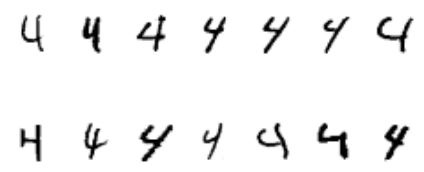

In [5]:
#def P5():

### STUDENT START ###
def P5(k):
    """Calculates the confusion matrix of a KNN model.
    
    Parameters:
    -----------
    k: number of neighbors for the KNN algorithm.
    
    Returns:
    --------
    Prints a confusion matrix, the most confused pair of digits and examples of these digits.
    """
    neighbors = KNeighborsClassifier(n_neighbors=k)
    neighbors.fit(mini_train_data,mini_train_labels)
    pred_labels = neighbors.predict(dev_data)
    # Calculate confusion matrix
    C = confusion_matrix(dev_labels,pred_labels)  
    print 'The confusion matrix is\n',C 
    # most confused pair of digits, insert 0 on the diagonals to hide the correct predictions
    np.fill_diagonal(C,0)
    most_confused_tuple = np.unravel_index(np.argmax(C),(10,10))
    print '\nThe most confused pair of digits is {p}'.format(p=most_confused_tuple)
    # get all the indices where the most confused pair is 
    pair_index = np.intersect1d(np.where(dev_labels==most_confused_tuple[0]) ,
               np.where(pred_labels ==most_confused_tuple[1]))

    # --------- plot each digit num_examples times------------------- #
    fig, axes = plt.subplots(nrows=2,ncols=7)
    flat_axes = axes.flatten()
    i = 0
    # generate subplot for each example for each digit
    for index in pair_index:
        dat_to_plot = dev_data[index].reshape(28,28)
        flat_axes[i].imshow(dat_to_plot,cmap='Greys')
        flat_axes[i].axis('off') # reduce the clutter around the images
        flat_axes[i].get_xaxis().set_visible(False) # reduce the whitespace
        flat_axes[i].get_yaxis().set_visible(False) # between the subplots
        i += 1
    fig.tight_layout()
    print '... and they look like this:\n'
    plt.show()
    
P5(1)

### STUDENT END ###

#P5()

(6) A common image processing technique is to smooth an image by blurring. The idea is that the value of a particular pixel is estimated as the weighted combination of the original value and the values around it. Typically, the blurring is Gaussian -- that is, the weight of a pixel's influence is determined by a Gaussian function over the distance to the relevant pixel.

Implement a simplified Gaussian blur by just using the 8 neighboring pixels: the smoothed value of a pixel is a weighted combination of the original value and the 8 neighboring values. Try applying your blur filter in 3 ways:
- preprocess the training data but not the dev data
- preprocess the dev data but not the training data
- preprocess both training and dev data

Note that there are Guassian blur filters available, for example in scipy.ndimage.filters. You're welcome to experiment with those, but you are likely to get the best results with the simplified version I described above.

In [154]:
#def P6():


### STUDENT START ###
def P6(use_convolution=False):
    """Calculates classification reports for preprocessed development and training data
    
    Parameters:
    -----------
    use_convolution: boolean, whether to use a convolution or weighted mean of pixels
    for Gaussian blurring
    
    Returns:
    --------
    Prints out classification reports for preprocessed and non-preprocessed training and
    development data sets.
    
    Notes:
    ------
    The get_smoothed_image() function allows to optimize the Gaussian kernel bandwidth (sigma),
    not implemented yet. Currently the bandwidth is set as 1/3 of the smoothing radius.
    """
    from numpy.core import multiarray # for calculating convolutions

    def gaussian_kernel_1d(x,sigma):
        """Gaussian probability density function (1-D)"""
        PI = 3.14159
        return 1/np.sqrt(2*PI*sigma**2)*np.exp(-x**2/(2*sigma**2))
    def gaussian_kernel_2d(x,y,sigma):
        """Gaussian probability density function (2-D)"""
        PI = 3.14159
        return 1/(2*PI*sigma**2)*np.exp(-(x**2+y**2)/(2*sigma**2))

    def get_distance_1d(radius):
        """Get the distance from the middle point"""
        return np.array(range(-radius,radius+1))

    def normalize(x): 
        """Normalize vector to sum up to 1"""
        return x/np.sum(x)

    def convolve(image,kernel):
        """Calculate convolution of image with kernel (1-D)"""
        return multiarray.correlate(image[:],kernel[::-1])

    def get_smoothed_pixel(data,row_index,col_index,radius,sigma,use_convolution):
        """Calculate smoothed color intensity for a pixel
    
        Parameters:
        -----------
        data = a list or 1 dimensionsal vector containing the color intensities.
        row_index = row index of the pixel to smooth
        col_index = column index of the pixel to smooth
        radius = radius in pixels of smoothing
        sigma = standard deviation of the Gaussian kernel
        use_convolution = boolean,
                True: use convolution of Gaussian blurring, False: use weighted mean
        """
        # follow http://www.coe.utah.edu/~cs4640/slides/Lecture5.pdf, slide 41
        # extract the surrounding pixels  
        im =data[(row_index-radius):(row_index+radius+1),(col_index-radius):(col_index+radius+1)]
        if(use_convolution is False):
            # get distance from pixel
            dist_vector_1d = get_distance_1d(1)
            # calculate 2d density
            g2d = [gaussian_kernel_2d(dist_vector_1d,y_dist,sigma) for y_dist in dist_vector_1d]
            norm_g2d = normalize(g2d)
            return np.mean(im*normalize(g2d))
        else:
            # 2D Gaussian kernel is seperable, calculate only 1D pdf
            kern = gaussian_kernel_1d(get_distance_1d(radius),sigma) 
            # normalize pdf to sum up to 1, one normalized kernel vector is enough as the 
            # Gaussian 2D kernel is symmetric
            norm = normalize(kern)
            # convolve first horizontally
            conv = np.apply_along_axis(convolve,0,im,norm)
            # convolve vertically
            conv2 = np.apply_along_axis(convolve,0,conv,norm)
            # take mean
            return np.mean(conv2)
    
    def smoothed_image(image_data,radius,sigma,use_convolution):
        """Return Gaussian blurred image"""
        # loop over all values of the image, deal with the boundary values by 
        # cropping them as the edges typically don't contain color intensities (all numbers are
        # written approx. in the middle of the images)
        img_dim = int(np.sqrt(len(image_data)))
        img_data = image_data.reshape(img_dim,img_dim)
        smoothed_array = np.array([get_smoothed_pixel(data=img_data,
                  row_index=row,col_index=col,radius=radius,sigma=sigma,
                  use_convolution=use_convolution)
              for row in range(radius,img_dim-radius) for col in range(radius,img_dim-radius)])
        return smoothed_array

    # check - works! (cropped dimensions)
    #plt.imshow(smoothed_image(dev_data[1],radius=1,sigma=3).reshape(26,26),cmap='Greys')

    #--------------------------- Preprocess ----------------------- #
    
    # Preprocessing mini train data and dev data, try with a radius = 1, sigma = 1/3
    # sigma could be optimized for maximizing accuracy, recall or F1 score.
    mini_train_data_blurred = [smoothed_image(record,radius=1,sigma=0.333,
                                              use_convolution=use_convolution) 
                               for record in mini_train_data]
    dev_data_blurred =  [smoothed_image(record,radius=1,sigma=0.333,
                                       use_convolution=use_convolution) 
                              for record in dev_data]
    
    # crop dev and mini_train_data to get the same dimensions as the smoothed images
    mini_train_data_cropped = [img.reshape(28,28)[1:27,1:27].ravel() for img in mini_train_data]
    dev_data_cropped = [img.reshape(28,28)[1:27,1:27].ravel() for img in dev_data]

    # --------------------------- Calculate ---------------------- #
    
    # Preprocessed dev data
    neighbors = KNeighborsClassifier(n_neighbors=1)
    neighbors.fit(mini_train_data_cropped,mini_train_labels)
    pred_labels = neighbors.predict(dev_data_blurred)
    print 'Preprocessed dev data:\n',classification_report(dev_labels,pred_labels)

    # Preprocessed mini training data
    neighbors = KNeighborsClassifier(n_neighbors=1)
    neighbors.fit(mini_train_data_blurred,mini_train_labels)
    pred_labels = neighbors.predict(dev_data_cropped)
    print 'Preprocessed training data:\n',classification_report(dev_labels,pred_labels)

    # Both preprocessed
    neighbors = KNeighborsClassifier(n_neighbors=1)
    neighbors.fit(mini_train_data_blurred,mini_train_labels)
    pred_labels = neighbors.predict(dev_data_blurred)
    print 'Both training data and dev data are preprocessed:\n',classification_report(
        dev_labels,pred_labels)

P6(use_convolution=False)
### STUDENT END ###

#P6()

Preprocessed dev data:
             precision    recall  f1-score   support

        0.0       0.00      0.00      0.00        99
        1.0       0.10      1.00      0.19       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.00      0.00      0.00        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.01      0.10      0.02      1000



/home/adam/anaconda3/envs/ipykernel_py2/lib/python2.7/site-packages/sklearn/metrics/classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


Preprocessed training data:
             precision    recall  f1-score   support

        0.0       0.72      0.99      0.83        99
        1.0       0.93      0.95      0.94       105
        2.0       0.79      0.85      0.82       102
        3.0       0.80      0.70      0.75        86
        4.0       0.92      0.76      0.83       104
        5.0       0.84      0.63      0.72        91
        6.0       0.92      0.83      0.87        98
        7.0       0.94      0.69      0.80       113
        8.0       0.58      0.78      0.66        96
        9.0       0.62      0.68      0.65       106

avg / total       0.81      0.79      0.79      1000

Both training data and dev data are preprocessed:
             precision    recall  f1-score   support

        0.0       0.92      0.98      0.95        99
        1.0       0.89      0.99      0.94       105
        2.0       0.98      0.80      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0      

ANSWER: Preprocessing both the development and training data increases the accuracy of classifications. However, preprocessing only one of the datasets decreases the accuracy. When the development data was preprocessed, the algorithm might have run into a -infinity value somewhere and the estimation did not work properly.

(7) Fit a Naive Bayes classifier and report accuracy on the dev data. Remember that Naive Bayes estimates P(feature|label). While sklearn can handle real-valued features, let's start by mapping the pixel values to either 0 or 1. You can do this as a preprocessing step, or with the binarize argument. With binary-valued features, you can use BernoulliNB. Next try mapping the pixel values to 0, 1, or 2, representing white, grey, or black. This mapping requires MultinomialNB. Does the multi-class version improve the results? Why or why not?

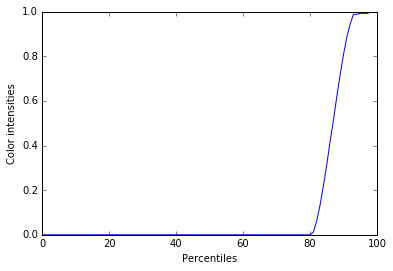

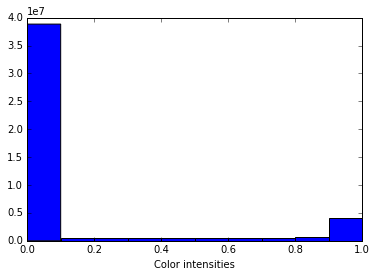

Bernoulli cut at 0 accuracy: 0.826
Bernoulli cut at 0.90 accuracy: 0.82
Multinomial cut at 0 and 0.90 accuracy: 0.821


In [10]:
### STUDENT START ###

def P7():
    """Calculate the accuracy of Naive Bayes estimator for digit classification.
    
    Parameters:
    -----------
    This function doesn't accept any arguments.
    
    Returns:
    -------
    Prints the accuracy of Naive Bayes models with different categorization thresholds.
    
    """
    # could have used np.digitize instead (as in a later problem)
    def categorize(intensities,threshold1,threshold2):
        """Group color intensities into three categories defined by two threshold values."""
        category = []
        for intensity in intensities:           
            if(intensity > threshold2):
                category.append(2)
            elif(intensity > threshold1 and intensity < threshold2):
                category.append(1)
            else:
                category.append(0)
        return category
    
    # -------- Choose threshold values for categorizing the color intensities ----- #
    train_data_flat = train_data.flatten()
    # plot percentiles to help choosing
    plt.plot(np.percentile(train_data_flat,range(0,100,1)))
    plt.ylabel('Color intensities')
    plt.xlabel('Percentiles')
    plt.show()
    
    plt.hist(train_data_flat)
    plt.xlabel('Color intensities')
    plt.show()
    # 0. seems to be threshold between no color and some color: use it as binary cutoff point
    # 0.9 is the color intensity chosen  by a ROC analysis of a multinomail logistic regression
    # shown in P12() below
    # categorize the training and development data for the multinomial analysis
    categorized_train_data =  [categorize(images,0,0.9) for images in train_data]
    categorized_dev_data =  [categorize(images,0,0.9) for images in dev_data]
    
    # ------------------------- Fit models -------------------------------------- #
    # binomial model
    bernoulli0 = BernoulliNB(binarize=0)
    bernoulli9 = BernoulliNB(binarize=0.9)
    bernoulli0.fit(train_data, train_labels)
    bernoulli9.fit(train_data, train_labels)
    # multinomial model
    multinomial_0_9 = MultinomialNB()
    multinomial_0_9.fit(categorized_train_data,train_labels)
    # calculate accuracies
    print 'Bernoulli cut at 0 accuracy: {acc}'.format(acc=bernoulli0.score(dev_data, dev_labels))
    print 'Bernoulli cut at 0.90 accuracy: {acc}'.format(acc=bernoulli9.score(dev_data, dev_labels))
    print 'Multinomial cut at 0 and 0.90 accuracy: {acc}'.format(acc=multinomial_0_9.score(categorized_dev_data, dev_labels))

P7()

### STUDENT END ###

ANSWER: The multi-class classification did not improve the accuracy of predictions on the development set. As the percentiles show, about 80% of the probability mass is concentrated on the 0 value. When any color is detected on the images, the color intensities quickly reach the darkest colors, and then level off almost at 1, their maximum. 

As the histogram shows, and can be concluded from the percentile distribution, the distribution is bimodal. The Bernoulli Naive Bayes is therefore an appropriate model to analyze this type of data. Especially, if we set the binarization threshold to 0. Higher thresholds such as 0.90, coming from a ROC analysis of multinomial logistic regressions shown in P12, contribute to a lower classification accuracy. 

If we think about the data generating process, this makes sense, as the ink of the pen that the respondents wrote the digits with is unicolored, and any color variation is probably due to the pressure expanded by the writing hand. Therefore, a higher than 0 classification threshold renders parts of the digits white, making them less regular, thereby increasing the difficulty of the classification.

The Multinomial Naive Bayes would be helpful in increasing the accuracy of digit recognition if some digits were written with a different color than others. This model has a somewhat lower classification accuracy than the binomial one with a threshold value at 0 because it tries to fit a model with three modes to a bimodal data. However, the Multinomial Naive Bayes slightly overperforms the the Bernoulli Naive Bayes with a threshold value over 0 because it retains the information that when any ink is found on the paper, it is a part of a digit. 

The result is close because the binarization threshold was chosen by the ROC analysis for the Binomial Naive Bayes case, the accuracy of the Multinomial Naive Bayes could possibly be improved by optimizing for its threshold values.

(8) Use GridSearchCV to perform a search over values of alpha (the Laplace smoothing parameter) in a Bernoulli NB model. What is the best value for alpha? What is the accuracy when alpha=0? Is this what you'd expect?

- Note that GridSearchCV partitions the training data so the results will be a bit different than if you used the dev data for evaluation.

             precision    recall  f1-score   support

        0.0       0.10      1.00      0.18        99
        1.0       0.00      0.00      0.00       105
        2.0       0.00      0.00      0.00       102
        3.0       0.00      0.00      0.00        86
        4.0       0.00      0.00      0.00       104
        5.0       0.00      0.00      0.00        91
        6.0       0.00      0.00      0.00        98
        7.0       0.00      0.00      0.00       113
        8.0       0.00      0.00      0.00        96
        9.0       0.00      0.00      0.00       106

avg / total       0.01      0.10      0.02      1000


 Classification report for alpha = 0
[[-inf -inf -inf ..., -inf -inf -inf]
 [-inf -inf -inf ..., -inf -inf -inf]
 [-inf -inf -inf ..., -inf -inf -inf]
 ..., 
 [-inf -inf -inf ..., -inf -inf -inf]
 [-inf -inf -inf ..., -inf -inf -inf]
 [-inf -inf -inf ..., -inf -inf -inf]]


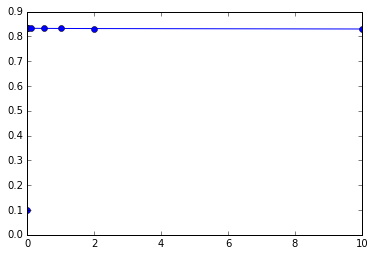

In [10]:
#def P8(alphas):

### STUDENT START ###

def P8(alphas):
    """Evaluate the accuracy of an additive smoother in a Bernoulli NB model
    
    Parameters:
    -----------
    
    alphas: numeric, positive number which specifies the value of the additive smoothing
            hyperparameter.
            
    Returns: GridSearchCV fit of the Bernoulli NB model. 
    --------
    
    """

    # --------------------- grid seach and model fit ---------------- #
    # grid seach over smoothing (hyper)parameters to cross validate
    #alphas = {'alpha':np.linspace(0,1,101)}
    bernoulli0 = BernoulliNB(binarize=0)
    bernoulli0_cv = GridSearchCV(bernoulli0,alphas)
    fit = bernoulli0_cv.fit(train_data, train_labels)
    # print 'Best alpha in CV = {alpha}'.format(alpha=fit.best_params_['alpha'])

    # ----------------- analyze accuracy ---------------- #
    # plot accuracy for each alpha tried in GridSearchCV
    # adapted from http://glowingpython.blogspot.dk/2014_04_01_archive.html
    res = zip(*[(acc_mean, acc_std.std(), p['alpha']) 
                for p, acc_mean, acc_std in bernoulli0_cv.grid_scores_])
    plt.plot(res[2],res[0],'-o')
    
    # check for alpha = 0
    bernoulli0_alpha0 = BernoulliNB(alpha=0,binarize=0)
    bernoulli0_alpha0.fit(train_data, train_labels)
    pred_labels = bernoulli0_alpha0.predict(dev_data)
    print classification_report(dev_labels,pred_labels)
    # from the classification report it seems that there was some problem with fitting it to the 
    # data
    # looking at the log probabilities, it seems that the algorithm ran into log(0) = -inf 
    # somewhere
    print '\n Classification report for alpha = 0\n',bernoulli0_alpha0.feature_log_prob_
    
    return fit

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)
### STUDENT END ###

#alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
#nb = P8(alphas)

In [13]:
print nb.best_params_

{'alpha': 0.0001}


ANSWER: The best value is $\alpha$ = 0.0001 or any arbitrarily small positive constant. The accuracy at 0 is not defined (however, the classification report returns a small value) because the model runs into errors in this case. The -infinity in the matrix of empirical log probabilities of features given a class shows that some probabilities given features are 0, and their log probability equals -infinity. This is the case for those features, the edges of the images, whose color intensity is always 0. 

(9) Try training a model using GuassianNB, which is intended for real-valued features, and evaluate on the dev data. You'll notice that it doesn't work so well. Try to diagnose the problem. You should be able to find a simple fix that returns the accuracy to around the same rate as BernoulliNB. Explain your solution.

Hint: examine the parameters estimated by the fit() method, theta\_ and sigma\_.

In [151]:
#def P9():



### STUDENT START ###
def P9():
    """Calculates accuracy of Gaussian NB model
    
    Parameters:
    -----------
    This function doesn't accept any arguments.
    
    Returns:
    --------
    Prints out classification tables of Gaussian NB models with and without preprocessing,
    and estimated coefficients and standard deviations of a Gaussian NB model without 
    preprocessing.
    """
    # using scipy gaussian blurring from scipy.ndimage.filter recommended in P6()
    from scipy.ndimage import gaussian_filter

    gaussian = GaussianNB()
    gaussian.fit(train_data, train_labels)
    pred_labels = gaussian.predict(dev_data)
    print 'Gaussian NB without preprocessing\n',classification_report(dev_labels,pred_labels)

    print 'theta: {theta}\n sigma: {sigma}\n'.format(theta=gaussian.theta_,sigma=gaussian.sigma_)
    # --------------- Preprocess training data -------------- #
    # preprocess training data by blurring it
    train_data_blurred = gaussian_filter(train_data,sigma=1)
    gaussian_blurred = GaussianNB()
    gaussian_blurred.fit(train_data_blurred, train_labels)
    pred_labels = gaussian_blurred.predict(dev_data)
    print 'Gaussian NB with Gaussian blurred training data\n',classification_report(dev_labels,pred_labels)

    # preprocess training data by adding random noise to it
    noise = []
    for i in range(len(train_data)):
        noise.append(np.random.normal(0,0.1,28*28))
    train_data_random = train_data+noise

    gaussian_random = GaussianNB()
    gaussian_random.fit(train_data_random, train_labels)
    pred_labels = gaussian_random.predict(dev_data)
    print'Gaussian NB with random noise added training data\n', classification_report(dev_labels,pred_labels)

gnb = P9()    
    
### STUDENT END ###

#gnb = P9()

Gaussian NB without preprocessing
             precision    recall  f1-score   support

        0.0       0.72      0.97      0.83        99
        1.0       0.83      0.94      0.88       105
        2.0       0.90      0.25      0.40       102
        3.0       0.77      0.42      0.54        86
        4.0       0.85      0.21      0.34       104
        5.0       0.40      0.02      0.04        91
        6.0       0.66      0.94      0.78        98
        7.0       0.79      0.27      0.41       113
        8.0       0.33      0.70      0.45        96
        9.0       0.39      0.94      0.55       106

avg / total       0.67      0.57      0.52      1000

theta: [[ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 ..., 
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]
 [ 0.  0.  0. ...,  0.  0.  0.]]
 sigma: [[  1.99394972e-10   1.99394972e-10   1.99394972e-10 ...,   1.99394972e-10
    1.99394972e-10   1.99394972e-10]


ANSWER: The Gaussian Naive Bayes model estimates a much lower accuracy than the Bernoulli Naive Bayes model. As shown by the estimated parameters, all coefficients and standard deviations are estimated to be zero. This is caused by the large number of zero color intensities, about 80% of all values, in the data as this model assumes normally distributed features. By adding a random noise coming from the normal distribution to the training data set, the classification accuracy of this model reaches the one of the Bernoulli Naive Bayes model. Alternatively, it is also possible to preprocess the training data by blurring which raises the variability of the features as well and increases the estimation accuracy.

[]

(10) Because Naive Bayes is a generative model, we can use the trained model to generate digits. Train a BernoulliNB model and then generate a 10x20 grid with 20 examples of each digit. Because you're using a Bernoulli model, each pixel output will be either 0 or 1. How do the generated digits compare to the training digits?

- You can use np.random.rand() to generate random numbers from a uniform distribution
- The estimated probability of each pixel is stored in feature\_log\_prob\_. You'll need to use np.exp() to convert a log probability back to a probability.

Examples of simulated digits of a Bernoulli NB model.

    First column shows the average color intensities for each digit of the training data set,
    rest of the columns show an example of the simulated digits.
    


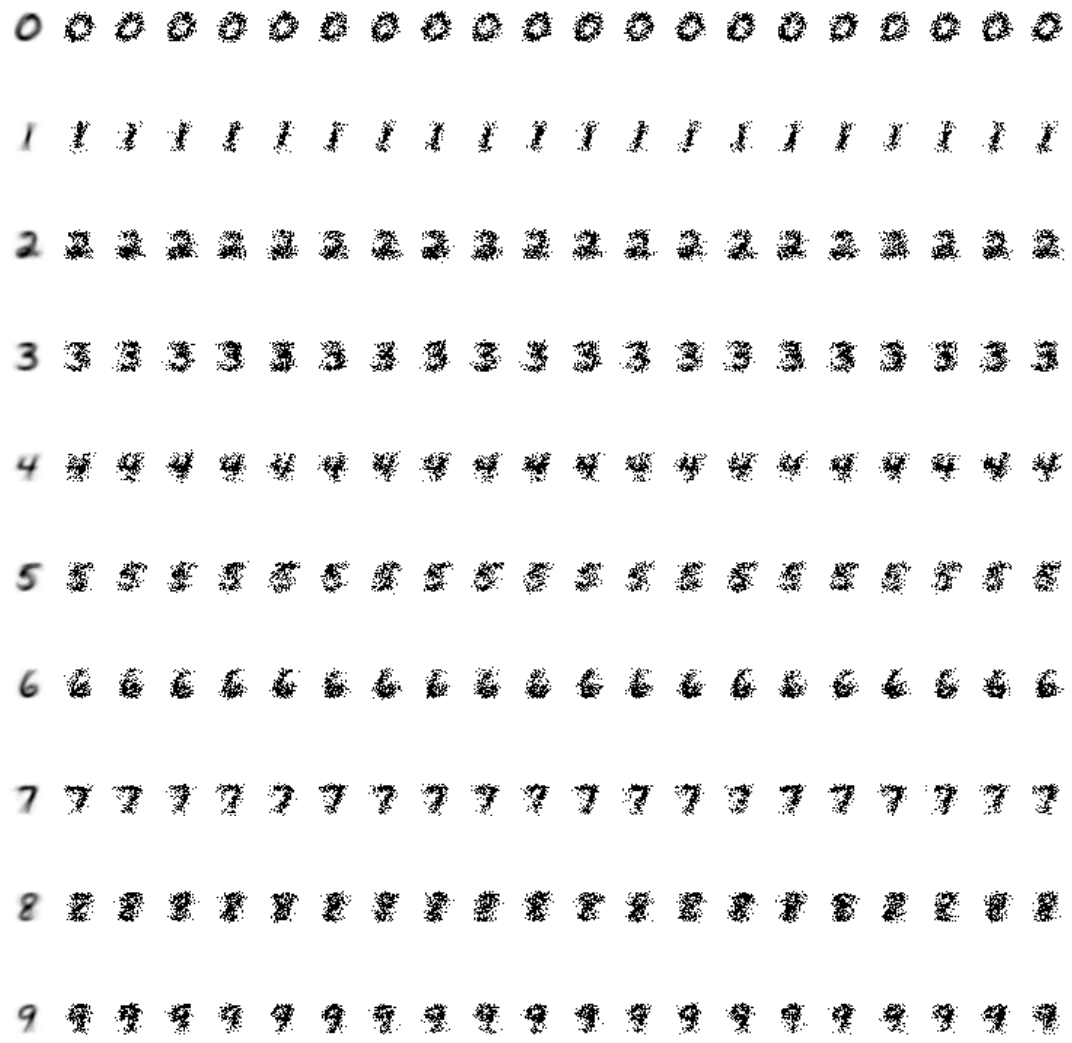

In [50]:
#def P10(num_examples):

### STUDENT START ###
def P10(num_examples):
    """Generate and plot digits from a fitted Bernoulli NB model
    
    Parameters:
    -----------
    num_examples: numeric,
                 Number of example digits to plot
                 
    Returns: 
    --------
    num_examples for each digit to plot and an extra plot showing the average digit in the
    training data set."""
    
    # get average color intensities for each digit
    def get_mean_digit_color(data,labels,digit):
        """Calculate average color intensity for a given digit"""
        indices = np.where(labels==digit)
        color_intensities =reduce(lambda image1,image2: image1+image2, 
                              data[indices])/len(indices)
        return color_intensities

    def generate_digit(fitted_object,digit):
        """Generate digit based on the Bernoulli NB fit"""
        return np.exp(fitted_object.feature_log_prob_)[digit]>np.random.rand(784)
    
    # fit model
    bernoulli = BernoulliNB(alpha=1e-6,binarize=0)
    bernoulli.fit(mini_train_data, mini_train_labels)

    # --------- plot each digit num_examples times------------------- #
    fig, axes = plt.subplots(nrows=10,
                             ncols=num_examples+1,
                             figsize=(15,16))
    # generate subplot for each example for each digit
    for digit in range(10):
        for nth in range(num_examples+1):
            if(nth is 0):
                dat_to_plot = get_mean_digit_color(mini_train_data,mini_train_labels,digit)
            else:                
                dat_to_plot = generate_digit(bernoulli,digit)
            axes[digit][nth].imshow(dat_to_plot.reshape(28,28),cmap='Greys')
            axes[digit][nth].axis('off') # reduce the clutter around the images
            axes[digit][nth].get_xaxis().set_visible(False) # reduce the whitespace
            axes[digit][nth].get_yaxis().set_visible(False) # between the subplots
            
                
    fig.tight_layout()
    print '''Examples of simulated digits of a Bernoulli NB model.\n
    First column shows the average color intensities for each digit of the training data set,
    rest of the columns show an example of the simulated digits.
    '''
    plt.show()


P10(20)

### STUDENT END ###

#P10(20)

ANSWER: The first column above shows the average color intensities for each digit in the mini training set while the rest of the columns depict a digit generated from the Bernoulli Naive Bayes model. As visible, the digits in the training data set, especially their averaged version, are much smoother while the generated digits are subject to simulating stochasticity and approximation by the Bernoulli NB model yielding a more noisy image.

(11) Remember that a strongly calibrated classifier is roughly 90% accurate when the posterior probability of the predicted class is 0.9. A weakly calibrated classifier is more accurate when the posterior is 90% than when it is 80%. A poorly calibrated classifier has no positive correlation between posterior and accuracy.

Train a BernoulliNB model with a reasonable alpha value. For each posterior bucket (think of a bin in a histogram), you want to estimate the classifier's accuracy. So for each prediction, find the bucket the maximum posterior belongs to and update the "correct" and "total" counters.

How would you characterize the calibration for the Naive Bayes model?

Accuracy of a Bernoulli Naive Bayes model with alpha = 1 and binarization threshold 0:

p(pred) <= 0.5000000000000    total =   0    accuracy = 0.000
p(pred) <= 0.9000000000000    total =  43    accuracy = 0.256
p(pred) <= 0.9990000000000    total = 114    accuracy = 0.395
p(pred) <= 0.9999900000000    total = 164    accuracy = 0.439
p(pred) <= 0.9999999000000    total = 220    accuracy = 0.486
p(pred) <= 0.9999999990000    total = 270    accuracy = 0.496
p(pred) <= 0.9999999999900    total = 323    accuracy = 0.548
p(pred) <= 0.9999999999999    total = 378    accuracy = 0.590
p(pred) <= 1.0000000000000    total = 1000    accuracy = 0.826


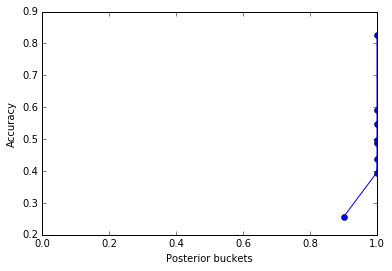

In [12]:
#def P11(buckets, correct, total):
    
### STUDENT START ###

def P11(buckets,alpha=1,threshold=0):
    """Calculate the accuracy of a Bernoulli NB model classification by posterior buckets.
    
    Parameters:
    -----------
    buckets: list or tuple of numeric values between 0 and 1.
    alpha: numeric, positive value, denotes the value of the additive smoother
    threshold: numeric, denotes the threshold for binarization
    
    Returns:
    --------
    a tuple of length 4: buckets denoting the posterior buckets; correct denoting
    the number of correct classifications in each bucket, total denoting the number of 
    classifications in each bucket; accuracy denoting the accuracy in each posterior bucket.
    """
    # fit model
    bernoulli = BernoulliNB(alpha=alpha,binarize=threshold)
    bernoulli.fit(train_data, train_labels)
    posterior_probs = bernoulli.predict_proba(dev_data)
    # find maximum posterior and predicted label
    posterior_max,pred_labels =zip(*map(lambda posterior_prob: (posterior_prob.max(),
                                   posterior_prob.argmax()),posterior_probs))  
    # count the number of predictions in each bucket
    total = np.histogram(posterior_max,[0]+buckets)[0]
    # sort the data into bins
    binned_posterior = np.digitize(posterior_max,buckets,right=True)
    # count totals of each bin
    total = np.bincount(binned_posterior)
    # correct if predicted equals observed label
    correct_label = pred_labels == dev_labels
    # count the correct predictions in each bucket
    correct = map(lambda bucket: sum(correct_label[np.where(bucket==binned_posterior)]),
                     np.arange(np.max(binned_posterior)+1))
    # calculate accuracy
    cumsum_correct,cumsum_total = np.add.accumulate(correct),np.add.accumulate(total)
    accuracy = cumsum_correct.astype(float)/cumsum_total
    return (buckets,cumsum_correct.astype(float),cumsum_total,accuracy)


### STUDENT END ###

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
#correct = [0 for i in buckets]
#total = [0 for i in buckets]

res = P11(buckets)
# unpack the results
buckets,correct,total,accuracy = res


print 'Accuracy of a Bernoulli Naive Bayes model with alpha = 1 and binarization threshold 0:\n'
for i in range(len(buckets)):
    accuracy = 0.0
    if (total[i] > 0): accuracy = correct[i] / total[i]
    print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)

# create calibration plot  
fig, ax = plt.subplots()    
ax.plot(buckets,res[3],'bo-')
ax.set_xlabel('Posterior buckets')
ax.set_xlim([0,1])
ax.set_ylabel('Accuracy')
plt.show()


ANSWER: As the accuracies with regards to the posterior buckets show on the plot, the Bernoulli NB model is weakly calibrated because the higher posterior probability values belong to higher accuracy values but the transformation function of the posterior buckets to accuracy is very far from the identity function.

(12) EXTRA CREDIT

Try designing extra features to see if you can improve the performance of Naive Bayes on the dev set. Here are a few ideas to get you started:
- Try summing the pixel values in each row and each column.
- Try counting the number of enclosed regions; 8 usually has 2 enclosed regions, 9 usually has 1, and 7 usually has 0.

Make sure you comment your code well!

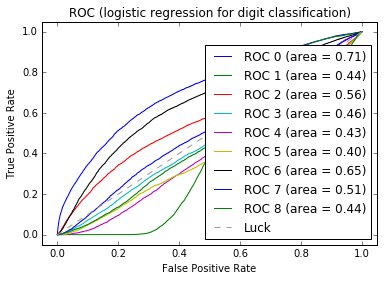

The optimal cutoff is [0.90288428598797754]


In [9]:
#def P12():

### STUDENT START ###

# Use logistic regression predictions and ROC to decide on the optimal cutoff for binarizing
# the Naive Bayes


## evaluation of this model is in P7()
import pandas as pd
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression

# fit logistic regression to obtain predicted probabilities for each label
logistic = LogisticRegression()
logistic.fit(train_data,train_labels)
probs = logistic.predict_proba(train_data)
prob_label = [probs[x][int(train_labels[x])] for x in range(len(train_labels))]
# get false positives, true positives and thresholds
fpr,tpr,thresholds = roc_curve(train_labels,prob_label,pos_label=3)


# calculate ROC curve for each label
for label in range(9):
    # Compute ROC curve and area the curve
    fpr,tpr,thresholds = roc_curve(train_labels,prob_label,pos_label=label)#
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=1, label='ROC %d (area = %0.2f)' % (label, roc_auc))

plt.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Luck')
plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC (logistic regression for digit classification)')
plt.legend(loc="lower right")
plt.show()




# http://stackoverflow.com/questions/28719067/roc-curve-and-cut-off-point-python
def get_optimal_cutoff(target, predicted,pos_label):
    """ Find the optimal probability cutoff point for a classification model related to event rate
    Parameters
    ----------
    target : Matrix with dependent or target data, where rows are observations

    predicted : Matrix with predicted data, where rows are observations

    Returns
    -------     
    list type, with optimal cutoff value

    """
    fpr, tpr, threshold = roc_curve(target, predicted,pos_label)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    roc_t = roc.ix[(roc.tf-0).abs().argsort()[:1]]

    return list(roc_t['threshold']) 


print 'The optimal cutoff is {this}'.format(this=
                    get_optimal_cutoff(train_labels,prob_label,pos_label=5))




### STUDENT END ###

#P12()

The multinomial logistic regression does not seem to be an appropriate model for this data as the AUC of half of the labels is worse than could be predicted by a coin flip.